# Installing the required libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install joblib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.6/294.6 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install -U scikit-learn

     ---------------------------------------- 9.2/9.2 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing the libraries

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

Reading the dataset

In [80]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

# Data preprocessing 

In [82]:
# checking for NULL values in the dataset
data.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

'flour_intensity' and 'fancy_color_overtone' has some null values.

In [83]:
# Unnamed: 0 column is not useful, so droping that column
data = data.drop(columns="Unnamed: 0")

In [84]:
data.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [85]:
data.nunique()

cut                               11
color                             11
clarity                           11
carat_weight                     878
cut_quality                        6
lab                                3
symmetry                           5
polish                             5
eye_clean                          5
culet_size                         9
culet_condition                    4
depth_percent                    534
table_percent                    235
meas_length                     1415
meas_width                      1155
meas_depth                       852
girdle_min                        10
girdle_max                        10
fluor_color                        6
fluor_intensity                    7
fancy_color_dominant_color        13
fancy_color_secondary_color       11
fancy_color_overtone               8
fancy_color_intensity             10
total_sales_price              22202
dtype: int64

In [86]:
# Deleting any duplicated rows as they can cause any overfitting or bias while training

data[data.duplicated]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
111,Round,L,I2,0.31,Very Good,GIA,Very Good,Very Good,unknown,unknown,...,2.75,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,274
238,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
240,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
241,Round,E,VS1,0.14,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,326
276,Round,F,VVS2,0.14,Excellent,IGI,Excellent,Excellent,unknown,unknown,...,0.00,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219494,Radiant,unknown,VS1,15.95,unknown,GIA,Good,Very Good,unknown,unknown,...,8.57,M,STK,unknown,Faint,Yellow,unknown,NaN,Fancy,378829
219506,Radiant,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,385128
219542,Emerald,K,VS2,15.14,unknown,GIA,Very Good,Excellent,Yes,N,...,7.78,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,420529
219551,Princess,G,VS2,9.05,unknown,GIA,Very Good,Very Good,Yes,N,...,7.55,unknown,unknown,unknown,Faint,unknown,unknown,unknown,unknown,431217


In [87]:
data = data.drop_duplicates()

In [88]:
# Changing categorical values by encoding using label encoder

from sklearn.preprocessing import LabelEncoder

In [89]:
lnc = LabelEncoder()
df = data.copy()
for i in data:
    r = data[i].dtypes
    if r == 'object':
        df[i] = lnc.fit_transform(data[i])

        # saving the files as joblib to use them later for testing
        joblib.dump(lnc, i+'.joblib', compress=9)

In [90]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215823 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          215823 non-null  int32  
 1   color                        215823 non-null  int32  
 2   clarity                      215823 non-null  int32  
 3   carat_weight                 215823 non-null  float64
 4   cut_quality                  215823 non-null  int32  
 5   lab                          215823 non-null  int32  
 6   symmetry                     215823 non-null  int32  
 7   polish                       215823 non-null  int32  
 8   eye_clean                    215823 non-null  int32  
 9   culet_size                   215823 non-null  int32  
 10  culet_condition              215823 non-null  int32  
 11  depth_percent                215823 non-null  float64
 12  table_percent                215823 non-null  float64
 13  meas

# Outlier Detection

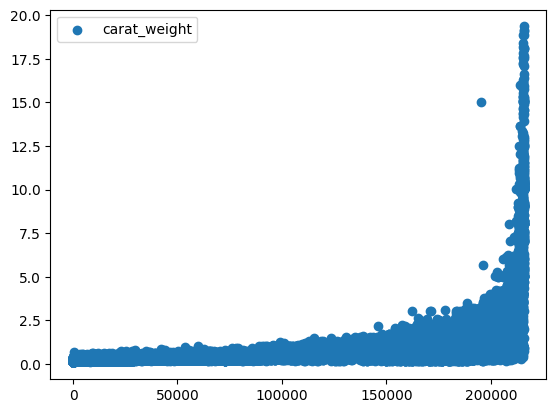

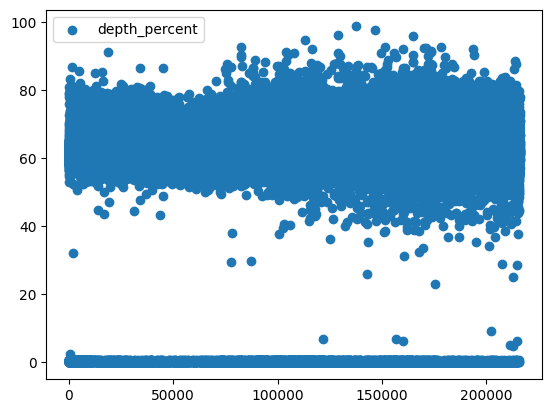

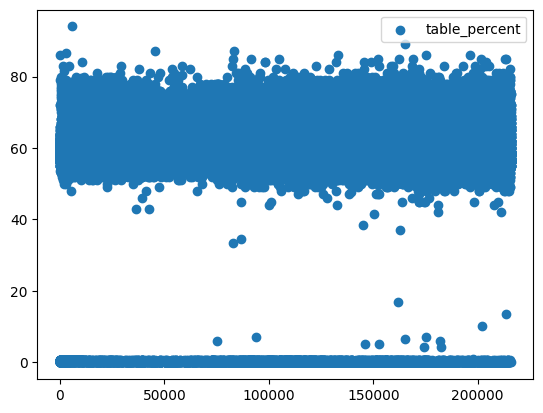

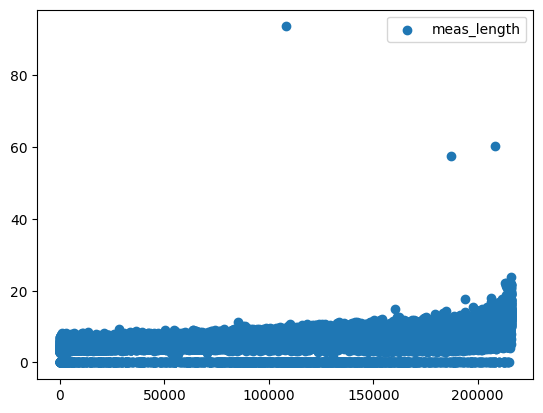

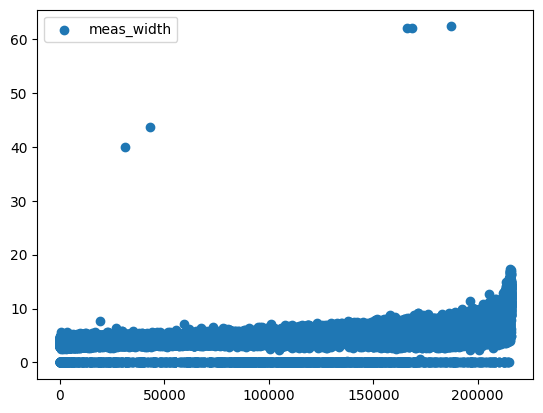

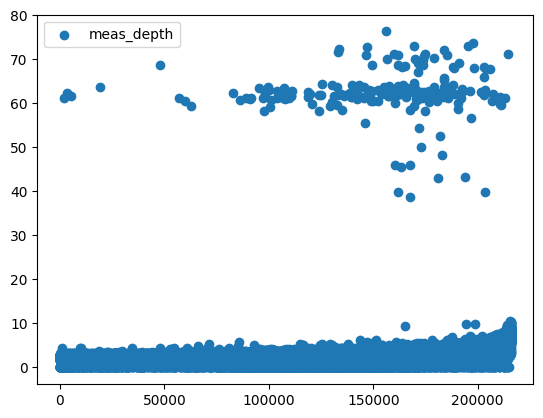

In [92]:
# plotting the dataset to understand it and see the outliers

for i in df:
    r = df[i].dtypes
    if r == 'float64':
        plt.scatter(range(len(df[i])), df[i], label=i)
        plt.legend()
        plt.show()

In [93]:
df = df[(df.meas_length < 40)]
df = df[(df.meas_width < 40)]
df = df[(df.meas_depth < 40)]

In [94]:
# checking if measured parameters are 0 or not

df[(df.meas_length == 0) | (df.meas_width == 0) | (df.meas_depth == 0) | (df.table_percent == 0) | (df.depth_percent == 0)]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
24,10,8,0,0.34,0,2,0,0,4,8,...,0.00,9,9,5,7,12,10,7,9,204
25,10,2,9,0.09,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,204
26,10,1,9,0.09,4,2,4,4,4,8,...,0.00,9,9,5,4,12,10,7,9,204
44,10,0,7,0.11,0,2,4,0,4,8,...,0.00,9,9,5,7,12,10,7,9,222
45,10,1,7,0.11,0,2,4,4,4,8,...,0.00,9,9,5,7,12,10,7,9,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218830,10,1,4,5.07,0,0,0,4,4,3,...,0.00,9,9,0,1,12,10,7,9,160984
219389,7,10,10,15.52,5,0,4,0,4,8,...,6.34,1,3,5,7,11,1,7,3,302640
219415,10,2,7,6.28,0,0,0,0,4,3,...,7.24,4,4,5,7,12,10,7,9,320733
219530,7,4,7,11.95,5,1,4,0,4,8,...,7.76,1,1,5,1,12,10,7,9,408347


In [95]:
df2 = df.copy()
df2 = df2[(df2.meas_length != 0)]
df2 = df2[(df2.meas_width != 0)]
df2 = df2[(df2.meas_depth != 0)]
df2 = df2[(df2.table_percent != 0)]
df2 = df2[(df2.depth_percent != 0)]

print(df.shape)
print(df2.shape)

(215602, 25)
(210516, 25)


# Feature selection and Data splitting

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<Axes: >

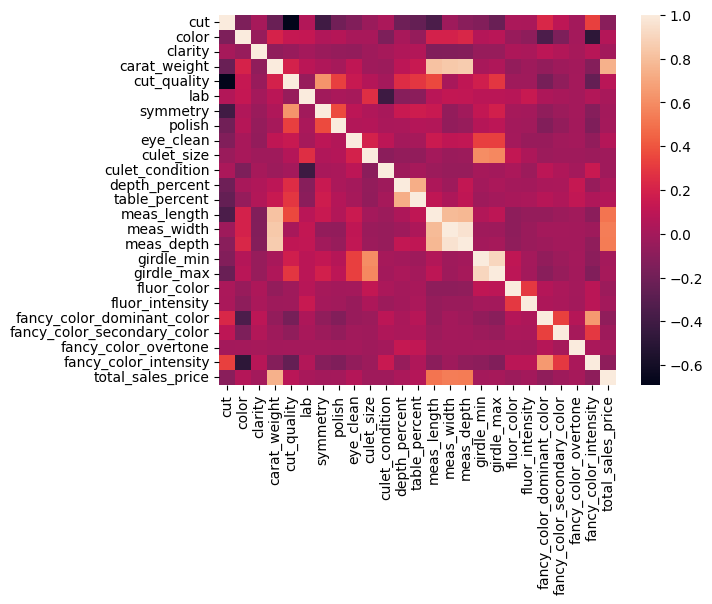

In [97]:
ss = MinMaxScaler()

corr = df2.corr()
sns.heatmap(corr)

In [98]:
features = []
for i in df2:
    if i!="total_sales_price":
        features.append(i)
print(features)

['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


In [99]:
X = df2[features]
Y = df2['total_sales_price']

print(X.shape)
print(Y.shape)

(210516, 24)
(210516,)


In [100]:
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import f_regression

fs = skb(f_regression, k="all")
fs.fit(X,Y)
for i in range(len(fs.scores_)):
    print('Feature of %d: %f' %(i, fs.scores_[i]))

Feature of 0: 2350.347620
Feature of 1: 762.692927
Feature of 2: 7.410806
Feature of 3: 262562.728182
Feature of 4: 1256.142707
Feature of 5: 51.838786
Feature of 6: 15.187011
Feature of 7: 0.750888
Feature of 8: 699.881209
Feature of 9: 61.577261
Feature of 10: 93.896122
Feature of 11: 177.943860
Feature of 12: 796.613344
Feature of 13: 73702.791740
Feature of 14: 87247.596712
Feature of 15: 84334.113209
Feature of 16: 0.245538
Feature of 17: 9.211894
Feature of 18: 191.824023
Feature of 19: 1.738448
Feature of 20: 1217.869921
Feature of 21: 114.291382
Feature of 22: 6.850983
Feature of 23: 1492.604092


In [103]:
fs = skb(f_regression, k=15)
Xnew = fs.fit_transform(X,Y)
f = np.array(features)
filt = fs.get_support()
f = f[filt]
print(f,len(f))

['cut' 'color' 'carat_weight' 'cut_quality' 'eye_clean' 'culet_condition'
 'depth_percent' 'table_percent' 'meas_length' 'meas_width' 'meas_depth'
 'fluor_color' 'fancy_color_dominant_color' 'fancy_color_secondary_color'
 'fancy_color_intensity'] 15


In [104]:
Xnew = X
y = Y.values.reshape(-1,1)
print(Xnew.shape)
print(y.shape)

(210516, 24)
(210516, 1)


In [105]:
print(Xnew, Xnew.shape)
print(y, y.shape)

        cut  color  clarity  carat_weight  cut_quality  lab  symmetry  polish  \
0        10      1       10          0.09            0    2         4       4   
1        10      1       10          0.09            4    2         4       4   
2        10      1       10          0.09            0    2         4       4   
3        10      1       10          0.09            0    2         4       4   
4        10      1       10          0.09            4    2         4       0   
...     ...    ...      ...           ...          ...  ...       ...     ...   
219698   10      1        7         10.65            0    0         0       0   
219699    9     10        8          5.17            5    0         4       4   
219700   10      1        7         18.07            0    0         0       0   
219701    8     10        5          0.90            5    0         2       2   
219702    7     10       10         10.03            5    0         4       0   

        eye_clean  culet_si

In [106]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(Xnew, y, test_size=0.2, random_state=40)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(168412, 24) (168412, 1)
(42104, 24) (42104, 1)


# Modelling the regression

Model 1: Linear Regression model

In [107]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

mlr.fit(X_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coeffs: ", list(zip(X, mlr.coef_)))

Intercept:  [50773.17711366]
Coeffs:  [('cut', array([ 7.07852801e+02, -7.78492054e+02,  2.84704212e+02,  3.84745818e+04,
       -2.32964293e+02, -2.60452907e+03,  7.64654138e+01,  5.98985813e+01,
        3.58389030e+02,  2.68026716e+01, -3.33078638e+03,  3.28231739e+01,
       -2.22981498e+02, -2.79226064e+03, -8.58530836e+02, -1.01142636e+04,
       -2.36244678e+01,  3.72036514e+01,  5.88163625e+01,  5.58835065e+01,
       -2.16841040e+03,  3.64897980e+02,  2.13614637e+03,  1.43478785e+02]))]


In [113]:
y_pred_mlr = mlr.predict(X_test)

In [115]:
#metrics

from sklearn import metrics

MABE = metrics.mean_absolute_error(y_test, y_pred_mlr)
r2 = mlr.score(X_test, y_test)*100

print("R squared error: ", r2)
print("Mean squared error: ", MABE)

R squared error:  65.43384622754775
Mean squared error:  4020.8006924083247


Model 2 : ANN

In [108]:
%pip install tensorflow

     -------------------------------------- 284.2/284.2 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 938.7/938.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 50.9/50.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.5/1.5 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.4 MB/s eta 0:00:00
     ---------------------

  DEPRECATION: wrapt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [116]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 24, kernel_initializer='normal', activation="relu"))
model.add(Dense(units= 50, kernel_initializer='normal', activation="relu"))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss="mean_squared_error", optimizer='adam')
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=2000, epochs=50, verbose=1)

Epoch 1/50
68/68 [==============================] - 1s 7ms/step - loss: 744209536.0000 - val_loss: 725745920.0000
Epoch 2/50
68/68 [==============================] - 0s 4ms/step - loss: 724835072.0000 - val_loss: 689425280.0000
Epoch 3/50
68/68 [==============================] - 0s 4ms/step - loss: 693500288.0000 - val_loss: 677256128.0000
Epoch 4/50
68/68 [==============================] - 0s 4ms/step - loss: 689667520.0000 - val_loss: 675061312.0000
Epoch 5/50
68/68 [==============================] - 0s 3ms/step - loss: 687246272.0000 - val_loss: 672281728.0000
Epoch 6/50
68/68 [==============================] - 0s 5ms/step - loss: 683883520.0000 - val_loss: 668307840.0000
Epoch 7/50
68/68 [==============================] - 0s 4ms/step - loss: 678872320.0000 - val_loss: 661926464.0000
Epoch 8/50
68/68 [==============================] - 0s 4ms/step - loss: 670472320.0000 - val_loss: 651118848.0000
Epoch 9/50
68/68 [==============================] - 0s 4ms/step - loss: 655754688.0000 -

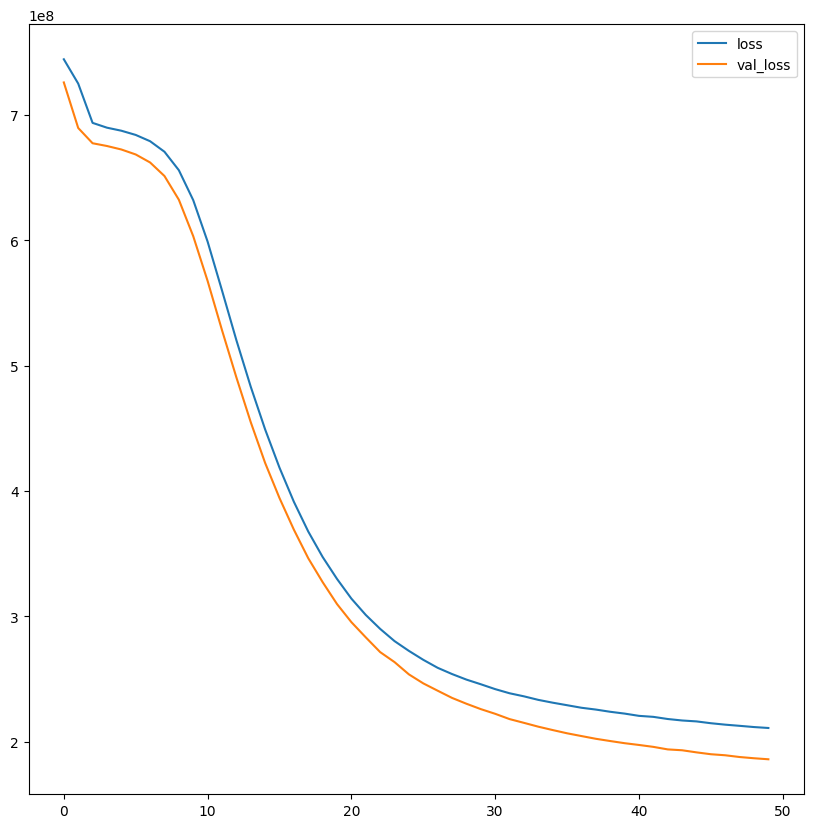

In [118]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.show()

In [124]:
#predictions
pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)*100
# r2 = r2_score(pred, y_test)*100

print("R squared: ", r2)

1316/1316 [==============================] - 1s 1ms/step
R squared:  76.43336303169158


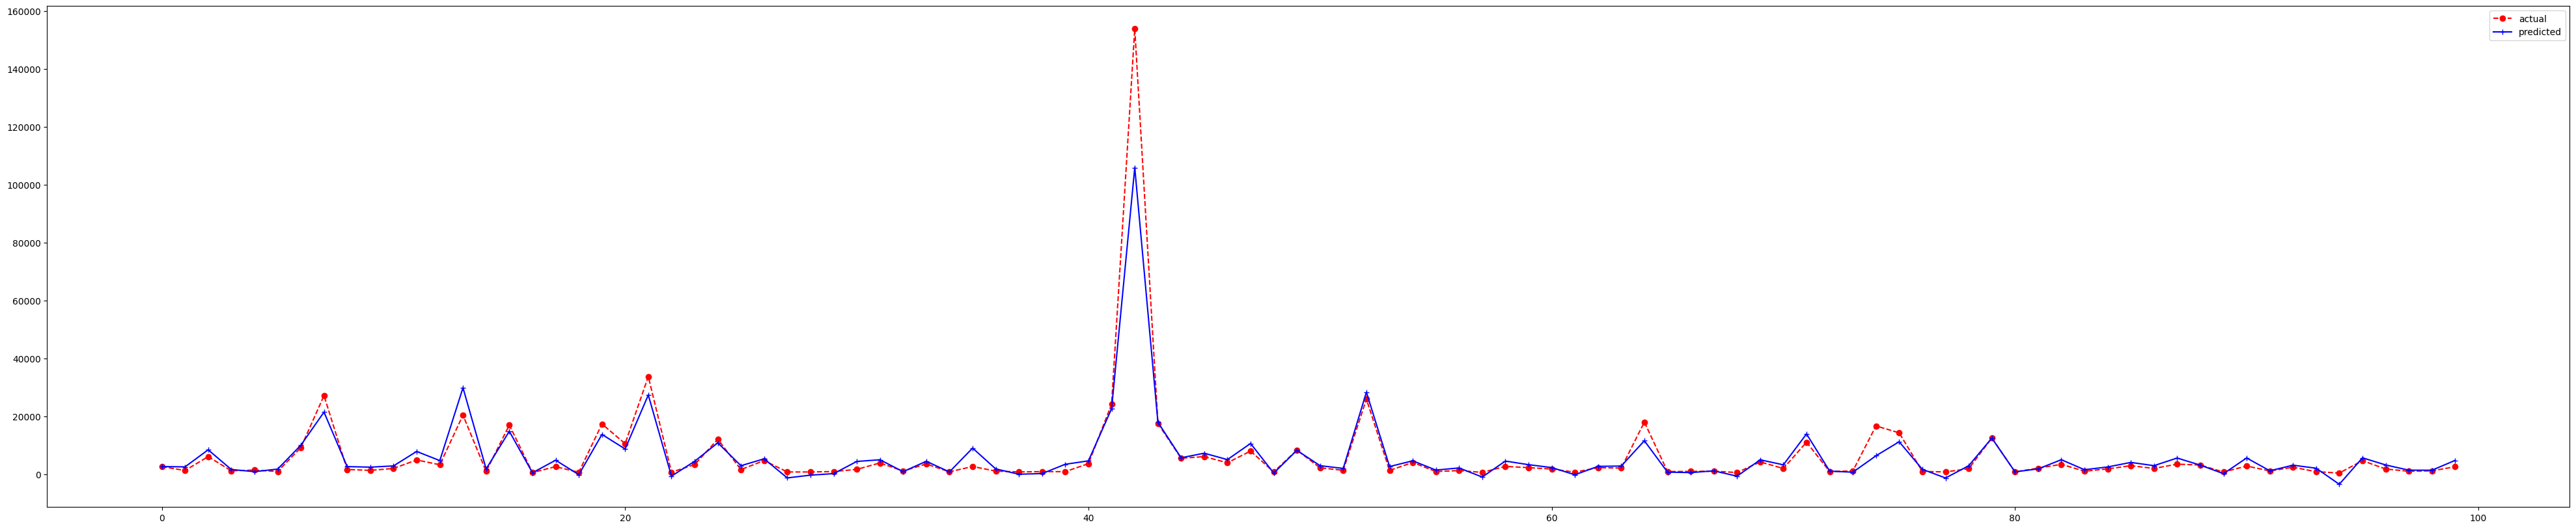

In [125]:
# plotting the fit

plt.figure(figsize=(50,10))
plt.plot(y_test[5000:5100], 'ro--', label='actual')
plt.plot(pred[5000:5100], 'b+-', label='predicted')
plt.legend()
plt.show()

# Saving model

In [126]:
model.save('tf_m_1.0.0.h5')

c:\Users\AgrawalK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
